In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import copy
from Options.Classes import Vanilla, Barrier
from Options.Hedge import DeltaHedgeMonteCarlo

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
_s = 100
_k = 100
_r = 0
_q = 0
_sigma = 0.15
_t = 40/252
_typeflag = "c"

MC_lens = 1000
T_lens = 40

In [3]:
np.random.seed(9999999)
cv = Vanilla(_s, _k, _r, _q, _sigma, _t, _typeflag)

pnl_cv = DeltaHedgeMonteCarlo(cv, MC_lens, T_lens)
t_value = pnl_cv.mean() / (pnl_cv.std()/np.sqrt(len(pnl_cv)))
t_value

D:\OneDrive\Intern\GTJA\DerivQuantProj\Options\Classes.py:70: RuntimeWarning: divide by zero encountered in true_divide
  d1 = (np.log(s/self.k) + (self.r-self.q+v**2/2)*t)/(v*np.sqrt(t))
D:\OneDrive\Intern\GTJA\DerivQuantProj\Options\Classes.py:111: RuntimeWarning: divide by zero encountered in true_divide
  d1 = (np.log(s_greek/self.k) + (self.r-self.q+v_greek**2/2)*t_greek)/(v_greek*np.sqrt(t_greek))


-0.35033875142880033

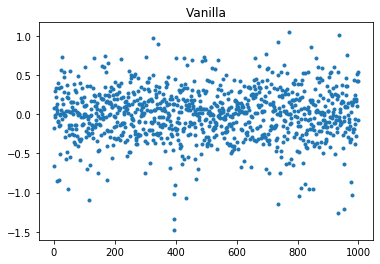

In [4]:
plt.figure()
plt.title("Vanilla")
plt.plot(pnl_cv, marker=".", ls=" ")
plt.show()

# I. Barrier and Vanilla: Delta Hedging Compared

In [30]:
np.random.seed(9999999)
_h = 95
_rebate = 0

_barrier = "di"

cb = Barrier(_s, _k, _r, _q, _sigma, _t, _h, _rebate, _barrier, _typeflag)

MC_lens = 1000
T_lens = 40
pnl_cb = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens)

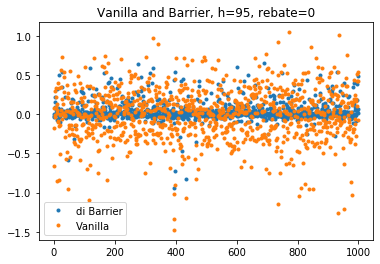

In [31]:
plt.figure()
plt.title("Vanilla and Barrier, h=%.0f, rebate=%.0f"%(_h,_rebate))
plt.plot(pnl_cb, marker=".", ls=" ", label="%s Barrier"%_barrier)
plt.plot(pnl_cv, marker=".", ls=" ", label="Vanilla")
plt.legend()
plt.show()

In [40]:
np.random.seed(9999999)
_h = 95
_rebate = 0

_barrier = "do"

cb = Barrier(_s, _k, _r, _q, _sigma, _t, _h, _rebate, _barrier, _typeflag)

MC_lens = 1000
T_lens = 40
pnl_cb = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens)

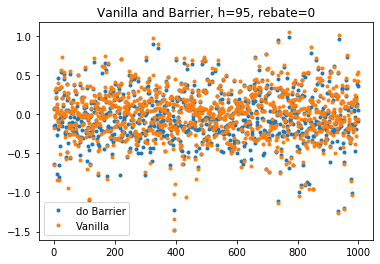

In [41]:
plt.figure()
plt.title("Vanilla and Barrier, h=%.0f, rebate=%.0f"%(_h,_rebate))
plt.plot(pnl_cb, marker=".", ls=" ", label="%s Barrier"%_barrier)
plt.plot(pnl_cv, marker=".", ls=" ", label="Vanilla")
plt.legend()
plt.show()

In [60]:
np.random.seed(9999999)
_h = 115
_rebate = 0

_barrier = "ui"

cb = Barrier(_s, _k, _r, _q, _sigma, _t, _h, _rebate, _barrier, _typeflag)
cv = Vanilla(_s, _k, _r, _q, _sigma, _t, _typeflag)

pnl_cb = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens)

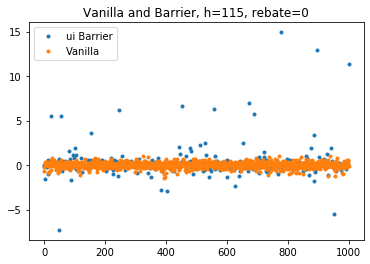

In [61]:
plt.figure()
plt.title("Vanilla and Barrier, h=%.0f, rebate=%.0f"%(_h,_rebate))
plt.plot(pnl_cb, marker=".", ls=" ", label="%s Barrier"%_barrier)
plt.plot(pnl_cv, marker=".", ls=" ", label="Vanilla")
plt.legend()
plt.show()

In [62]:
np.random.seed(9999999)
_h = 115
_rebate = 0

_barrier = "uo"

cb = Barrier(_s, _k, _r, _q, _sigma, _t, _h, _rebate, _barrier, _typeflag)
cv = Vanilla(_s, _k, _r, _q, _sigma, _t, _typeflag)

pnl_cb = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens)

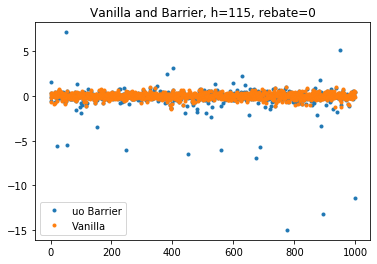

In [63]:
plt.figure()
plt.title("Vanilla and Barrier, h=%.0f, rebate=%.0f"%(_h,_rebate))
plt.plot(pnl_cb, marker=".", ls=" ", label="%s Barrier"%_barrier)
plt.plot(pnl_cv, marker=".", ls=" ", label="Vanilla")
plt.legend()
plt.show()

# II. Delta Hedging Frequency

增加Delta Hedging频率：可以适当降低pnl的波动，但是效果不强

In [58]:
np.random.seed(9999999)
_h = 95
_rebate = 0

_barrier = "di"

cb = Barrier(_s, _k, _r, _q, _sigma, _t, _h, _rebate, _barrier, _typeflag)

MC_lens = 1000

T_lens0 = 400
pnl_cb0 = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens0)

T_lens1 = 40
pnl_cb1 = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens1)

T_lens2 = 8
pnl_cb2 = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens2)

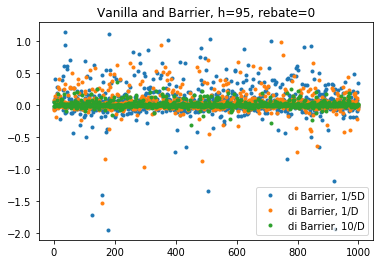

In [59]:
plt.figure()
plt.title("Vanilla and Barrier, h=%.0f, rebate=%.0f"%(_h,_rebate))
plt.plot(pnl_cb2, marker=".", ls=" ", label="%s Barrier, 1/5D"%_barrier)
plt.plot(pnl_cb1, marker=".", ls=" ", label="%s Barrier, 1/D"%_barrier)
plt.plot(pnl_cb0, marker=".", ls=" ", label="%s Barrier, 10/D"%_barrier)
plt.legend()
plt.show()

In [15]:
np.random.seed(9999999)
_h = 95
_rebate = 0

_barrier = "do"

cb = Barrier(_s, _k, _r, _q, _sigma, _t, _h, _rebate, _barrier, _typeflag)

MC_lens = 1000

T_lens0 = 400
pnl_cb0 = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens0)

T_lens1 = 40
pnl_cb1 = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens1)

T_lens2 = 8
pnl_cb2 = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens2)

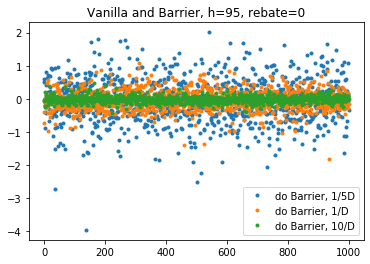

In [16]:
plt.figure()
plt.title("Vanilla and Barrier, h=%.0f, rebate=%.0f"%(_h,_rebate))
plt.plot(pnl_cb2, marker=".", ls=" ", label="%s Barrier, 1/5D"%_barrier)
plt.plot(pnl_cb1, marker=".", ls=" ", label="%s Barrier, 1/D"%_barrier)
plt.plot(pnl_cb0, marker=".", ls=" ", label="%s Barrier, 10/D"%_barrier)
plt.legend()
plt.show()

In [64]:
np.random.seed(9999999)
_h = 115
_rebate = 0

_barrier = "ui"

cb = Barrier(_s, _k, _r, _q, _sigma, _t, _h, _rebate, _barrier, _typeflag)

MC_lens = 1000

T_lens0 = 400
pnl_cb0 = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens0)

T_lens1 = 40
pnl_cb1 = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens1)

T_lens2 = 8
pnl_cb2 = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens2)

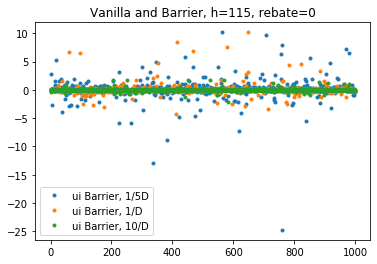

In [65]:
plt.figure()
plt.title("Vanilla and Barrier, h=%.0f, rebate=%.0f"%(_h,_rebate))
plt.plot(pnl_cb2, marker=".", ls=" ", label="%s Barrier, 1/5D"%_barrier)
plt.plot(pnl_cb1, marker=".", ls=" ", label="%s Barrier, 1/D"%_barrier)
plt.plot(pnl_cb0, marker=".", ls=" ", label="%s Barrier, 10/D"%_barrier)
plt.legend()
plt.show()

In [66]:
np.random.seed(9999999)
_h = 115
_rebate = 0

_barrier = "uo"

cb = Barrier(_s, _k, _r, _q, _sigma, _t, _h, _rebate, _barrier, _typeflag)

MC_lens = 1000

T_lens0 = 400
pnl_cb0 = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens0)

T_lens1 = 40
pnl_cb1 = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens1)

T_lens2 = 8
pnl_cb2 = DeltaHedgeMonteCarlo(cb, MC_lens, T_lens2)

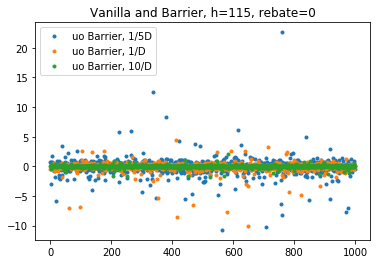

In [67]:
plt.figure()
plt.title("Vanilla and Barrier, h=%.0f, rebate=%.0f"%(_h,_rebate))
plt.plot(pnl_cb2, marker=".", ls=" ", label="%s Barrier, 1/5D"%_barrier)
plt.plot(pnl_cb1, marker=".", ls=" ", label="%s Barrier, 1/D"%_barrier)
plt.plot(pnl_cb0, marker=".", ls=" ", label="%s Barrier, 10/D"%_barrier)
plt.legend()
plt.show()

# III. Delta Hedging and H

In [21]:
np.random.seed(9999999)
_h1 = 85
_h2 = 90
_h3 = 95
_rebate = 0

_barrier = "di"

cb1 = Barrier(_s, _k, _r, _q, _sigma, _t, _h1, _rebate, _barrier, _typeflag)
cb2 = Barrier(_s, _k, _r, _q, _sigma, _t, _h2, _rebate, _barrier, _typeflag)
cb3 = Barrier(_s, _k, _r, _q, _sigma, _t, _h3, _rebate, _barrier, _typeflag)

MC_lens = 1000
T_lens = 40

pnl_cb1 = DeltaHedgeMonteCarlo(cb1, MC_lens, T_lens)
pnl_cb2 = DeltaHedgeMonteCarlo(cb2, MC_lens, T_lens)
pnl_cb3 = DeltaHedgeMonteCarlo(cb3, MC_lens, T_lens)

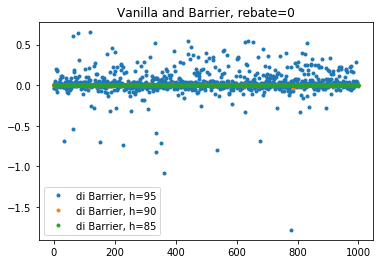

In [22]:
plt.figure()
plt.title("Vanilla and Barrier, rebate=%.0f"%(_rebate))
plt.plot(pnl_cb3, marker=".", ls=" ", label="%s Barrier, h=%.0f"%(_barrier,_h3))
plt.plot(pnl_cb2, marker=".", ls=" ", label="%s Barrier, h=%.0f"%(_barrier,_h2))
plt.plot(pnl_cb1, marker=".", ls=" ", label="%s Barrier, h=%.0f"%(_barrier,_h1))
plt.legend()
plt.show()

In [23]:
np.random.seed(9999999)
_h1 = 85
_h2 = 90
_h3 = 95
_rebate = 0

_barrier = "do"

cb1 = Barrier(_s, _k, _r, _q, _sigma, _t, _h1, _rebate, _barrier, _typeflag)
cb2 = Barrier(_s, _k, _r, _q, _sigma, _t, _h2, _rebate, _barrier, _typeflag)
cb3 = Barrier(_s, _k, _r, _q, _sigma, _t, _h3, _rebate, _barrier, _typeflag)

MC_lens = 1000
T_lens = 40

pnl_cb1 = DeltaHedgeMonteCarlo(cb1, MC_lens, T_lens)
pnl_cb2 = DeltaHedgeMonteCarlo(cb2, MC_lens, T_lens)
pnl_cb3 = DeltaHedgeMonteCarlo(cb3, MC_lens, T_lens)

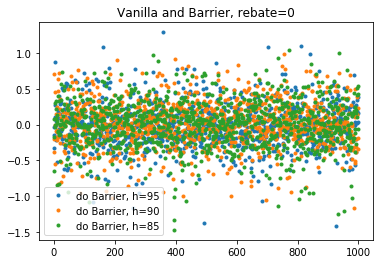

In [24]:
plt.figure()
plt.title("Vanilla and Barrier, rebate=%.0f"%(_rebate))
plt.plot(pnl_cb3, marker=".", ls=" ", label="%s Barrier, h=%.0f"%(_barrier,_h3))
plt.plot(pnl_cb2, marker=".", ls=" ", label="%s Barrier, h=%.0f"%(_barrier,_h2))
plt.plot(pnl_cb1, marker=".", ls=" ", label="%s Barrier, h=%.0f"%(_barrier,_h1))
plt.legend()
plt.show()

In [25]:
np.random.seed(9999999)
_h1 = 105
_h2 = 110
_h3 = 115
_rebate = 0

_barrier = "ui"

cb1 = Barrier(_s, _k, _r, _q, _sigma, _t, _h1, _rebate, _barrier, _typeflag)
cb2 = Barrier(_s, _k, _r, _q, _sigma, _t, _h2, _rebate, _barrier, _typeflag)
cb3 = Barrier(_s, _k, _r, _q, _sigma, _t, _h3, _rebate, _barrier, _typeflag)

MC_lens = 1000
T_lens = 40

pnl_cb1 = DeltaHedgeMonteCarlo(cb1, MC_lens, T_lens)
pnl_cb2 = DeltaHedgeMonteCarlo(cb2, MC_lens, T_lens)
pnl_cb3 = DeltaHedgeMonteCarlo(cb3, MC_lens, T_lens)

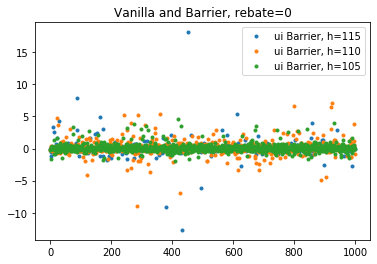

In [26]:
plt.figure()
plt.title("Vanilla and Barrier, rebate=%.0f"%(_rebate))
plt.plot(pnl_cb3, marker=".", ls=" ", label="%s Barrier, h=%.0f"%(_barrier,_h3))
plt.plot(pnl_cb2, marker=".", ls=" ", label="%s Barrier, h=%.0f"%(_barrier,_h2))
plt.plot(pnl_cb1, marker=".", ls=" ", label="%s Barrier, h=%.0f"%(_barrier,_h1))
plt.legend()
plt.show()

In [27]:
np.random.seed(9999999)
_h1 = 105
_h2 = 110
_h3 = 115
_rebate = 0

_barrier = "uo"

cb1 = Barrier(_s, _k, _r, _q, _sigma, _t, _h1, _rebate, _barrier, _typeflag)
cb2 = Barrier(_s, _k, _r, _q, _sigma, _t, _h2, _rebate, _barrier, _typeflag)
cb3 = Barrier(_s, _k, _r, _q, _sigma, _t, _h3, _rebate, _barrier, _typeflag)

MC_lens = 1000
T_lens = 40

pnl_cb1 = DeltaHedgeMonteCarlo(cb1, MC_lens, T_lens)
pnl_cb2 = DeltaHedgeMonteCarlo(cb2, MC_lens, T_lens)
pnl_cb3 = DeltaHedgeMonteCarlo(cb3, MC_lens, T_lens)

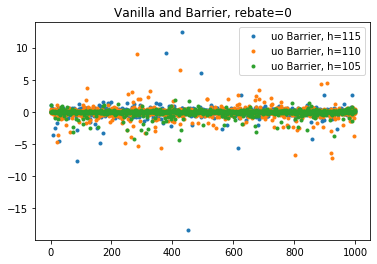

In [28]:
plt.figure()
plt.title("Vanilla and Barrier, rebate=%.0f"%(_rebate))
plt.plot(pnl_cb3, marker=".", ls=" ", label="%s Barrier, h=%.0f"%(_barrier,_h3))
plt.plot(pnl_cb2, marker=".", ls=" ", label="%s Barrier, h=%.0f"%(_barrier,_h2))
plt.plot(pnl_cb1, marker=".", ls=" ", label="%s Barrier, h=%.0f"%(_barrier,_h1))
plt.legend()
plt.show()

# IV. Delta Hedging with Fixed Hedging Frequency, H and Rebate

In [29]:
# TODO